# GE 461 Introduction to Data Science 2024

# Project 3 – Supervised Learning

### Görkem Kadir Solun 22003214

### Notes

Changing the random seeds affects the output.

You may need to update the data path.

You may need to update the figure sizes for pyplot.

### Imports


In [68]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

# NOTE: Changing the random seeds affects the output.
random.seed(321)
np.random.seed(321)

### Loading and Processing the Data

I created raw, centered, and normalized data to use.


In [69]:
# Load the data
# NOTE: This data may need to be configured to the correct path
directory = os.getcwd()
train_data_path = os.path.join(directory, "data\\train1.txt")
test_data_path = os.path.join(directory, "data\\test1.txt")

train_data = np.loadtxt(train_data_path)
test_data = np.loadtxt(test_data_path)
all_data = np.concatenate((train_data, test_data), axis=0)

print("Train Data Shape: ", train_data.shape)
print("Test Data Shape: ", test_data.shape)

# Get the mean of the all the data
all_data_mean = np.mean(all_data)
print("Mean: ", all_data_mean)

# Center the data
centered_data = all_data - all_data_mean
centered_train_data = train_data - all_data_mean
centered_test_data = test_data - all_data_mean

# Normalize the data
all_data_min = np.min(centered_data, axis=0)
all_data_max = np.max(centered_data, axis=0)
all_data_range = all_data_max - all_data_min
normalized_data = (centered_data - all_data_min) / all_data_range
normalized_train_data = (centered_train_data - all_data_min) / all_data_range
normalized_test_data = (centered_test_data - all_data_min) / all_data_range

Train Data Shape:  (60, 2)
Test Data Shape:  (41, 2)
Mean:  -14.43713867108911


### Plot Configurations


In [70]:
# Figure size configuration
# NOTE: This is a global configuration for all figures, you may need to adjust this
# NOTE: This change is permanent and will be iterated and applied every time you run this script
""" fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = fig_size[0] * 1.7
fig_size[1] = fig_size[1] * 1.7
plt.rcParams["figure.figsize"] = fig_size """

' fig_size = plt.rcParams["figure.figsize"]\nfig_size[0] = fig_size[0] * 1.7\nfig_size[1] = fig_size[1] * 1.7\nplt.rcParams["figure.figsize"] = fig_size '

# Artificial Neural Network

An ANN with one-dimensional input and output, having either one or no hidden layers.

Math behind my implementations

y = W @ X + B

dL/dW = (dL/dy) @ XT

dL/dB = (dL/dy)

dL/dX = (WT @ (dL/dy))

dL/dX = dL/dy \* sigmoid'(X)


In [71]:
# An ANN with one-dimensional input and output, having either one or no hidden layers.
class ArtificialNeuralNetwork:
    def __init__(self, hidden_layer_size=0):
        self.hidden_layer_size = hidden_layer_size
        self.output_bias = np.random.randn(1)

        # Initialize the weights and biases
        # If there is a hidden layer, initialize the weights and biases for both layers
        # If there is no hidden layer, initialize the weights and biases for the input-output layer

        # If there is a hidden layer (input-hidden-output)
        if hidden_layer_size != 0:
            self.input_hidden_weights = np.random.randn(1, hidden_layer_size)
            self.hidden_output_weights = np.random.randn(hidden_layer_size, 1)
            self.hidden_bias = np.random.randn(hidden_layer_size)
        # If there is no hidden layer (input-output)
        else:
            self.input_output_weights = np.random.randn(1, 1)

    # Sigmoid function for activation of the neurons in the network
    # sigmoid(X) = 1 / (1 + exp(-X))
    # The output of the sigmoid function is between 0 and 1 for all X
    # This function is used to normalize the output of the neurons
    # and to introduce non-linearity to the network
    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))

    # Derivative of the sigmoid function
    # It is used to calculate the gradient of the loss function
    # with respect to the weights and biases of the network
    # It is used in the backpropagation algorithm to update the weights and biases
    # Sigmoid derivative is calculated as sigmoid(X) * (1 - sigmoid(X))
    def sigmoid_derivative(self, X):
        return X * (1 - X)

    # Sum of squared error loss function
    # The loss function is used to measure the difference between the predicted output
    # and the actual output of the networks
    def sum_squared_error(self, y_true, y_predicted, to_round=True):
        # Round the result to 0 decimal placess
        sum_squared_error = np.sum(np.square(y_true - y_predicted))
        return round(sum_squared_error, 0) if to_round else sum_squared_error

    # Forward pass of the network
    # The forward pass is used to calculate the output of the network
    def forward_propagation(self, X):
        # If there is a hidden layer
        # The output of the network is calculated as the input multiplied by the weights and added the bias
        # then passed through the sigmoid activation function
        # The output of the hidden layer is then multiplied by the weights and added the bias
        if self.hidden_layer_size != 0:
            self.hidden_layer_output = self.sigmoid(
                (X @ self.input_hidden_weights) + self.hidden_bias
            )
            self.output = (
                self.hidden_layer_output @ self.hidden_output_weights
            ) + self.output_bias
        # If there is no hidden layer
        # The output of the network is calculated as the input multiplied by the weights and added the bias
        else:
            self.output = np.dot(X, self.input_output_weights) + self.output_bias

        return self.output

    # Backward pass of the network
    # The backward pass is used to update the weights and biases of the network
    # It is used to minimize the loss function
    # The backpropagation algorithm is used to calculate the gradients of the loss function
    # with respect to the weights and biases of the network
    # The gradients are then used to update the weights and biases
    # The learning rate is used to control the step size of the updates to the weights and biases
    def backward_propagation(self, X, y, learning_rate=0.01):
        # Output error is calculated as sum of squared error loss function
        # The derivative of the loss function with respect to the output is calculated as
        output_error = -2 * (y - self.output)  # dL/dy

        # If there is a hidden layer
        # The backpropagation algorithm is used to calculate the gradients of the loss function
        # with respect to the weights and biases of the network
        # using the chain rule of calculus
        if self.hidden_layer_size != 0:
            # First calculate the gradient of the output-hidden layer, similar to the input-output layer
            hidden_output_weights_gradient = (
                self.hidden_layer_output.T @ output_error
            )  # dL/dW2
            hidden_output_bias_gradient = np.sum(output_error)  # dL/dB2

            # Then calculate the gradient of the hidden-input layer
            # by backpropagating the error from the output layer to the hidden layer
            hidden_output_error = (
                output_error @ self.hidden_output_weights.T
            )  # dE/dX = WT @ dE/dY

            # Then calculate the gradient of the hidden layer
            # by multiplying with the derivative of the sigmoid function
            # and the input of the hidden layer
            hidden_output_error = hidden_output_error * self.sigmoid_derivative(
                self.hidden_layer_output
            )  # dE/dX = dE/dy * sigmoid'(X)

            # Weight gradient is the dot product of the input and the error
            # as the derivative of the output with respect to the weights is the input
            input_hidden_weights_gradient = X.T @ hidden_output_error  # dL/dW1
            # Bias gradient is the sum of the error
            input_hidden_bias_gradient = np.sum(hidden_output_error)  # dL/dB1

            # Finally, update the weights and biases of the network
            # by multiplying the gradients with the learning rate
            self.hidden_output_weights -= hidden_output_weights_gradient * learning_rate
            self.output_bias -= hidden_output_bias_gradient * learning_rate
            self.input_hidden_weights -= input_hidden_weights_gradient * learning_rate
            self.hidden_bias -= input_hidden_bias_gradient * learning_rate

        # If there is no hidden layer
        else:
            # The derivative of the loss function with respect to the weights and bias of the input-output layer
            # is calculated as the derivative of the loss function with respect to the output
            # multiplied by the derivative of the output with respect to the weights and bias
            # The derivative of the output with respect to the weights is the input
            # The derivative of the output with respect to the bias is 1
            input_output_weights_gradient = X.T @ output_error  # dL/dW
            input_output_bias_gradient = np.sum(output_error)  # dL/dB

            # The weights and bias of the input-output layer are updated
            self.input_output_weights -= input_output_weights_gradient * learning_rate
            self.output_bias -= input_output_bias_gradient * learning_rate

        return output_error

    # Train the network
    # The training process is used to update the weights and biases of the network
    # using the stochastic gradient descent algorithm
    def train(self, X, y, epochs=10000, learning_rate=0.001):
        for epoch in range(epochs):
            # Stochastic Gradient Descent which chooses a random sample
            random_index = np.random.randint(len(X))

            # Get the random sample from the data
            # Reshape the data to be compatible with the network
            X_sample = X[random_index].reshape(-1, 1)
            y_sample = y[random_index].reshape(-1, 1)

            # Forward and Backward passes
            self.forward_propagation(X_sample)
            self.backward_propagation(X_sample, y_sample, learning_rate)

    # Predict the output of the network
    # The predict function is used to calculate the output of the network
    def predict(self, X):
        return self.forward_propagation(X)

    # Plot the data
    def plot(self, X, y, title="Data Plot"):
        X_values = np.linspace(np.min(X), np.max(X), 100).reshape(-1, 1)
        y_values = self.predict(X_values)

        plt.grid()
        plt.scatter(X, y, color="blue", label="Given Data")
        plt.plot(X_values, y_values, color="red", label="Predicted Data")
        plt.xlabel("X - Input")
        plt.ylabel("Y - Output")
        plt.title(title)
        plt.legend()

        plt.show()

# A - Comparing and Finding Configurations

### No hidden layer


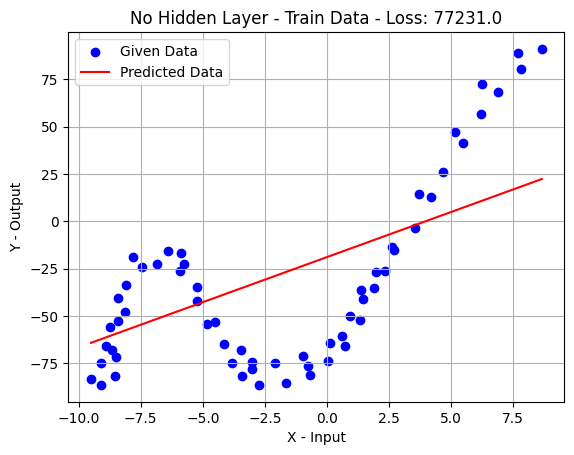

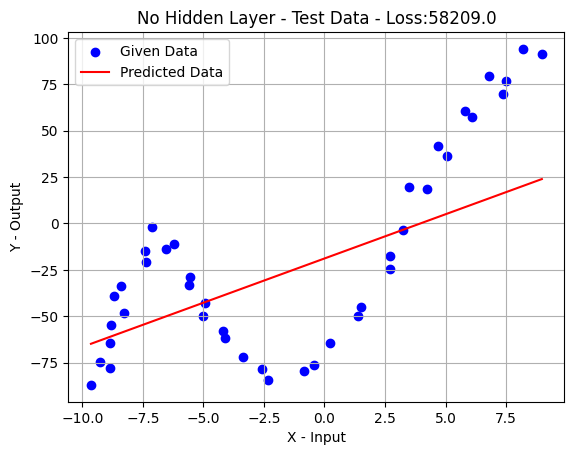

In [72]:
# Prepare the data for training
train_input = train_data[:, 0].reshape(-1, 1)
train_output = train_data[:, 1].reshape(-1, 1)
test_input = test_data[:, 0].reshape(-1, 1)
test_output = test_data[:, 1].reshape(-1, 1)

# Train the network with no hidden layer using the training data
artificialNeuralNetwork = ArtificialNeuralNetwork()
artificialNeuralNetwork.train(
    train_input,
    train_output,
)

# Plot the predicted output of the network with no hidden layer
artificialNeuralNetwork.plot(
    train_input, train_output, title=f"No Hidden Layer - Train Data - Loss: {
        artificialNeuralNetwork.sum_squared_error(train_output, artificialNeuralNetwork.predict(train_input))
        }"
)

artificialNeuralNetwork.plot(
    test_input, test_output, title=f"No Hidden Layer - Test Data - Loss:{
        artificialNeuralNetwork.sum_squared_error(test_output, artificialNeuralNetwork.predict(test_input))
    }"
)

### No Hidden Layer Normalized Data


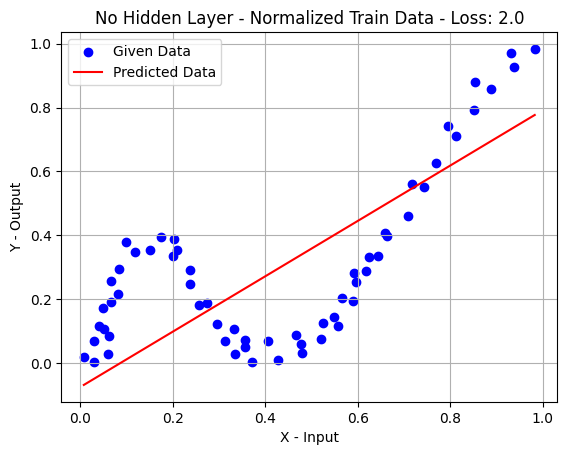

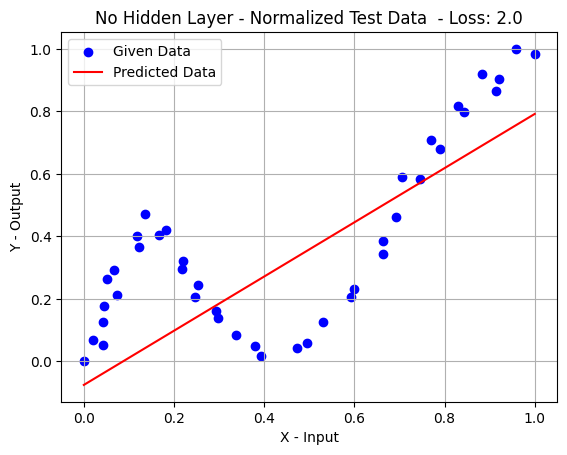

In [73]:
# Prepare the normalized data for training
train_input_normalized = normalized_train_data[:, 0].reshape(-1, 1)
train_output_normalized = normalized_train_data[:, 1].reshape(-1, 1)
test_input_normalized = normalized_test_data[:, 0].reshape(-1, 1)
test_output_normalized = normalized_test_data[:, 1].reshape(-1, 1)

# Train the network with no hidden layer using the normalized training data
artificialNeuralNetwork_normalized = ArtificialNeuralNetwork()
artificialNeuralNetwork_normalized.train(
    train_input_normalized,
    train_output_normalized,
)

# Plot the predicted output of the network with no hidden layer using the normalized data
artificialNeuralNetwork_normalized.plot(
    train_input_normalized,
    train_output_normalized,
    title=f"No Hidden Layer - Normalized Train Data - Loss: {
        artificialNeuralNetwork_normalized.sum_squared_error(train_output_normalized, artificialNeuralNetwork_normalized.predict(train_input_normalized))
        }",
)

artificialNeuralNetwork_normalized.plot(
    test_input_normalized,
    test_output_normalized,
    title=f"No Hidden Layer - Normalized Test Data  - Loss: {
        artificialNeuralNetwork_normalized.sum_squared_error(test_output_normalized, artificialNeuralNetwork_normalized.predict(test_input_normalized))
        }",
)

### One Hidden Layer ANN

Tested 2, 4, 8, 16, 32, 64, and 128 as hidden layer sizes, epochs are 10000, learning rate is 0.001


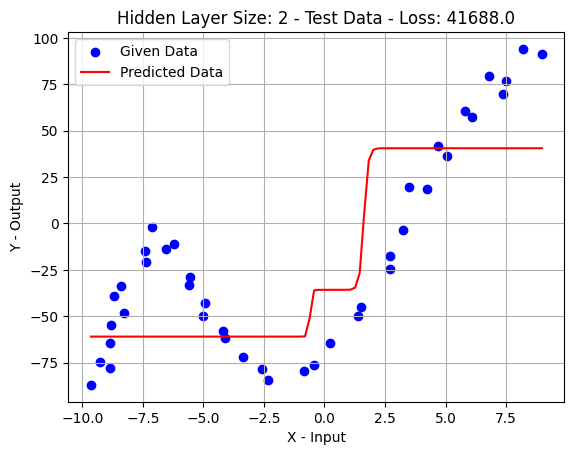

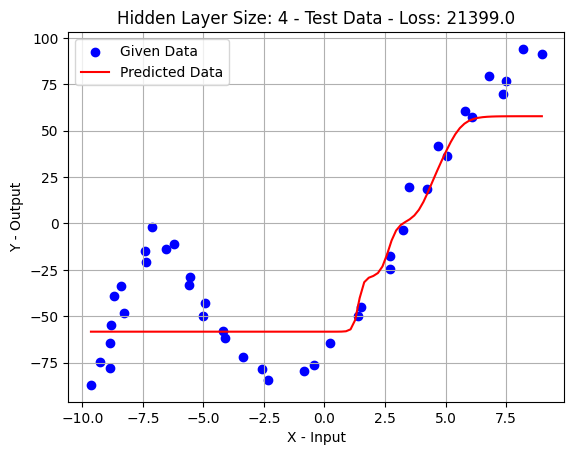

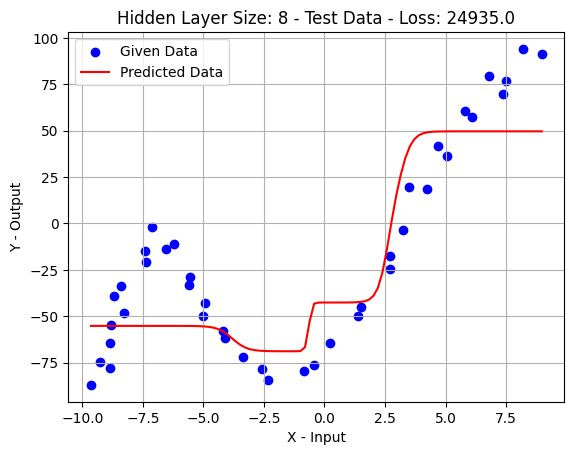

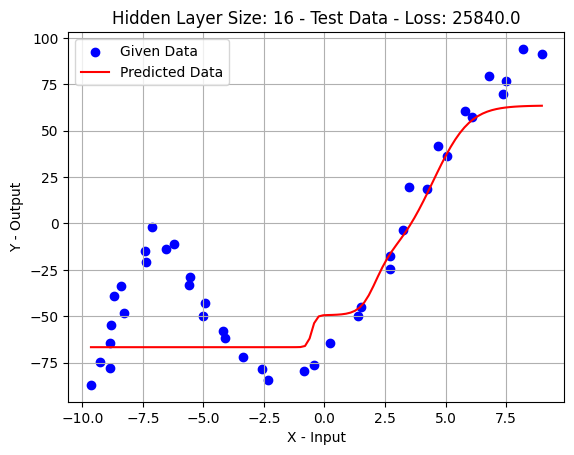

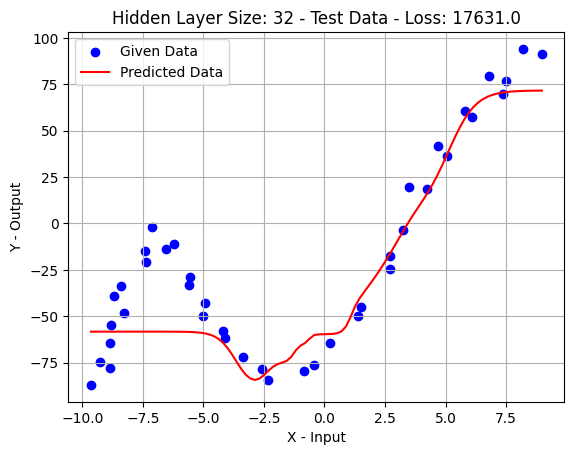

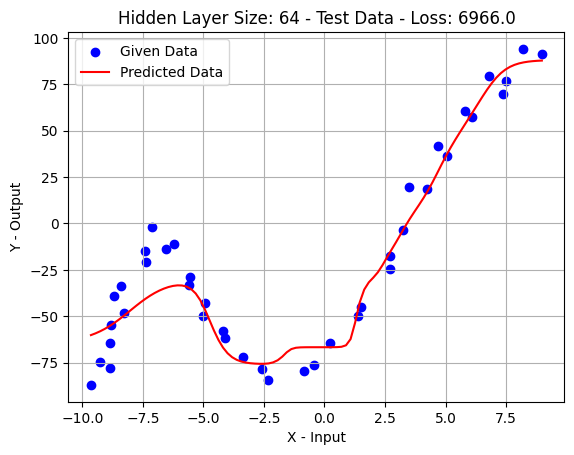

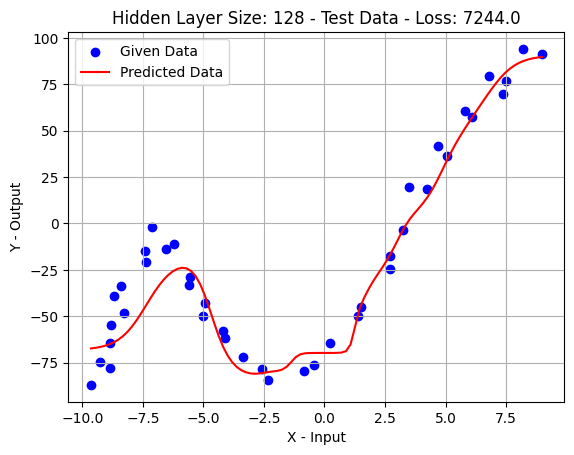

In [74]:
# Train the network with a hidden layer with different hidden layer sizes
hidden_layer_sizes = [2, 4, 8, 16, 32, 64, 128]
for hidden_layer_size in hidden_layer_sizes:
    artificialNeuralNetwork = ArtificialNeuralNetwork(hidden_layer_size=hidden_layer_size)

    # Train the network with a hidden layer using the training data
    artificialNeuralNetwork.train(
        train_input,
        train_output,
    )

    # Plot the predicted output of the network with a hidden layer
    """ artificialNeuralNetwork.plot(
        train_input,
        train_output,
        title=f"Hidden Layer Size: {hidden_layer_size} - Train Data - Loss: {
            artificialNeuralNetwork.sum_squared_error(train_output, artificialNeuralNetwork.predict(train_input))
            }",
    ) """

    artificialNeuralNetwork.plot(
        test_input,
        test_output,
        title=f"Hidden Layer Size: {hidden_layer_size} - Test Data - Loss: {
            artificialNeuralNetwork.sum_squared_error(test_output, artificialNeuralNetwork.predict(test_input))
            }",
    )

Tested 1000, 5000, 10000, 50000, 100000, and 500000 as epochs, hidden layer size is 32, learning rate is 0.001


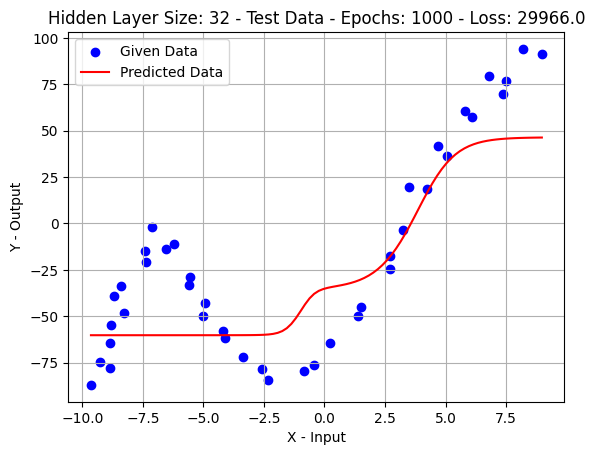

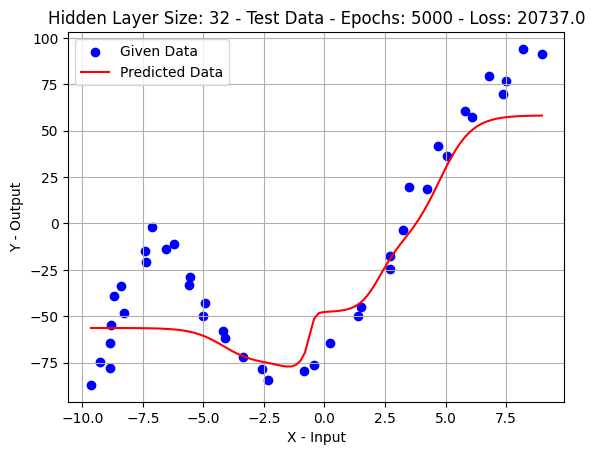

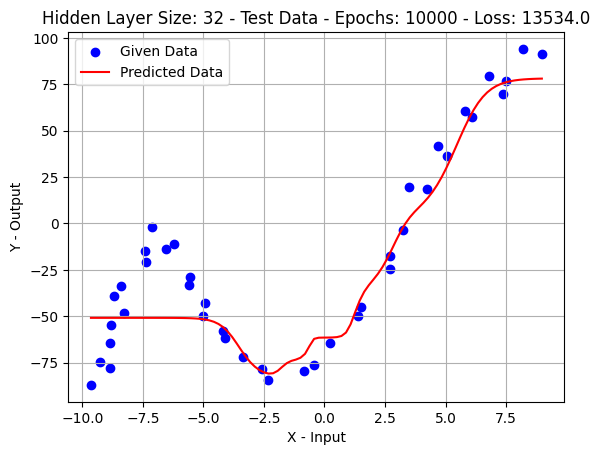

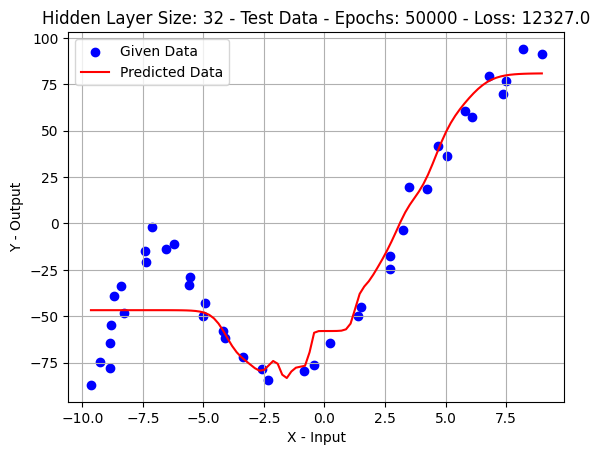

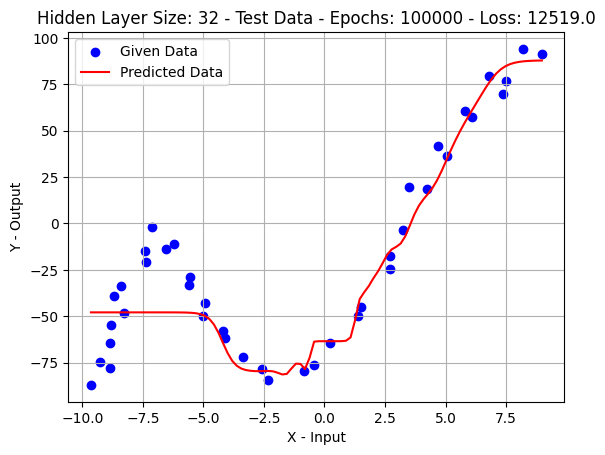

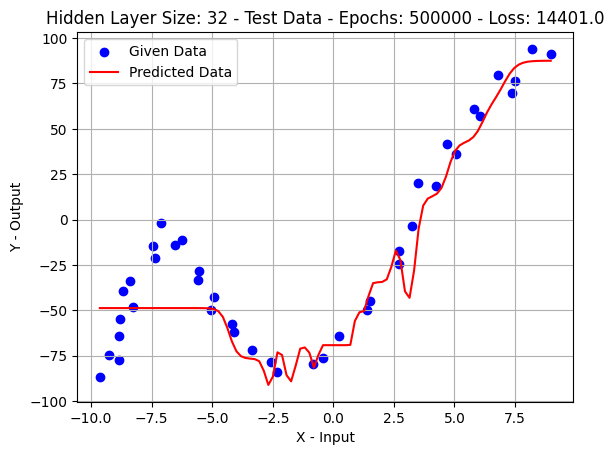

In [75]:
# Train the network with a hidden layer with different epochs
epochs = [1000, 5000, 10000, 50000, 100000, 500000]
for epoch in epochs:
    artificialNeuralNetwork = ArtificialNeuralNetwork(hidden_layer_size=32)

    # Train the network with a hidden layer using the training data
    artificialNeuralNetwork.train(
        train_input,
        train_output,
        epochs=epoch,
    )

    # Plot the predicted output of the network with a hidden layer
    """ artificialNeuralNetwork.plot(
        train_input,
        train_output,
        title=f"Hidden Layer Size: 32 - Train Data - Epochs: {epoch} - Loss: {
            artificialNeuralNetwork.sum_squared_error(train_output, artificialNeuralNetwork.predict(train_input))
            }",
    ) """
    
    artificialNeuralNetwork.plot(
        test_input,
        test_output,
        title=f"Hidden Layer Size: 32 - Test Data - Epochs: {epoch} - Loss: {
            artificialNeuralNetwork.sum_squared_error(test_output, artificialNeuralNetwork.predict(test_input))
            }",
    )

Tested 0.01, 0.005, 0.001, 0.0005, and 0.0001 as learning rates, epochs are 10000, hidden layer size is 32


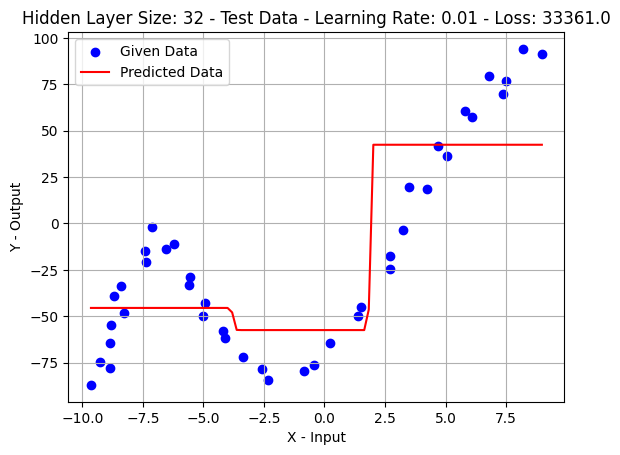

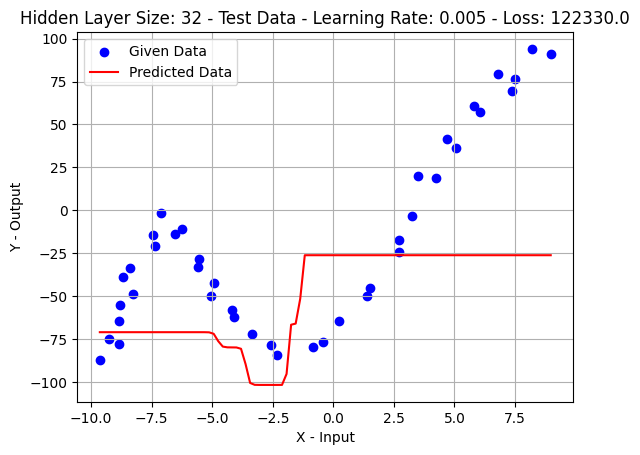

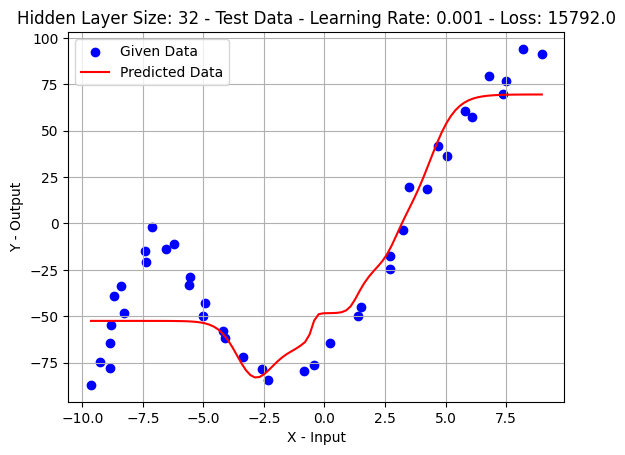

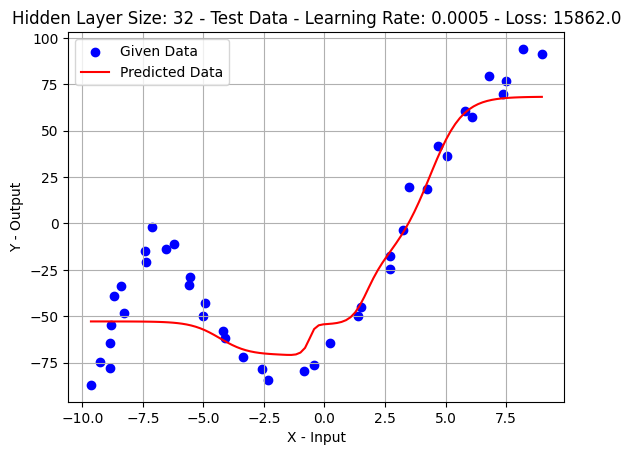

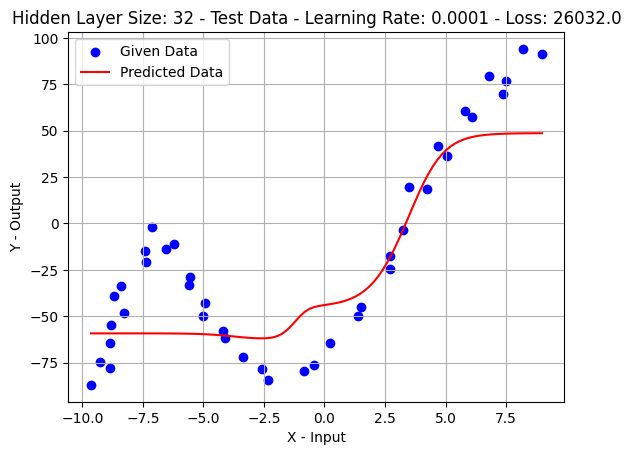

In [76]:
# Train the network with a hidden layer with learning rates
learning_rates = [0.01, 0.005, 0.001, 0.0005, 0.0001]
for learning_rate in learning_rates:
    artificialNeuralNetwork = ArtificialNeuralNetwork(hidden_layer_size=32)
    
    # Train the network with a hidden layer using the training data
    artificialNeuralNetwork.train(
        train_input,
        train_output,
        learning_rate=learning_rate,
    )
    
    # Plot the predicted output of the network with a hidden layer  
    """ artificialNeuralNetwork.plot(
        train_input,
        train_output,
        title=f"Hidden Layer Size: 32 - Train Data - Learning Rate: {learning_rate} - Loss: {
            artificialNeuralNetwork.sum_squared_error(train_output, artificialNeuralNetwork.predict(train_input))
            }",
    ) """
    
    artificialNeuralNetwork.plot(
        test_input,
        test_output,
        title=f"Hidden Layer Size: 32 - Test Data - Learning Rate: {learning_rate} - Loss: {
            artificialNeuralNetwork.sum_squared_error(test_output, artificialNeuralNetwork.predict(test_input))
            }",
    )   

Tested normalized data vs raw data, epochs are 500000, learning rate is 0.001, hidden layer size is 128


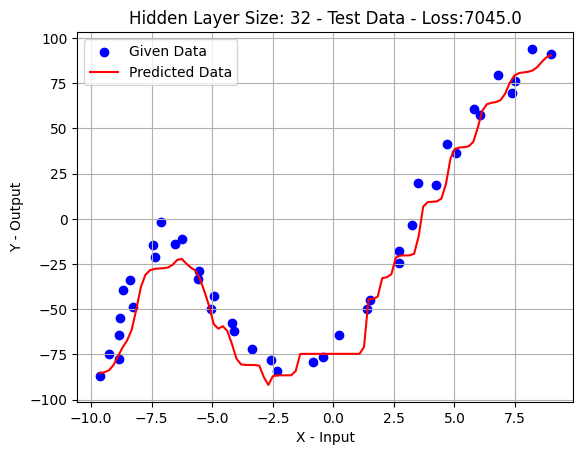

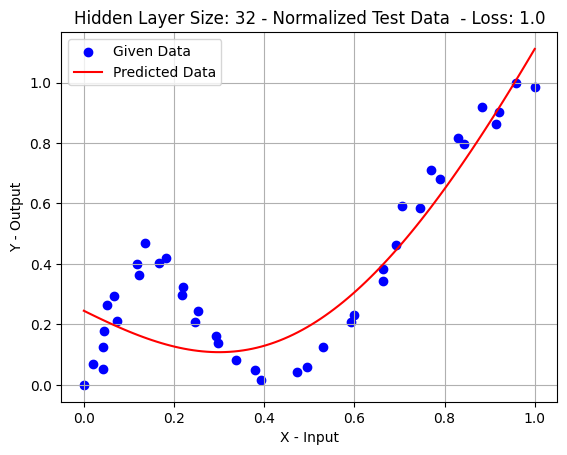

In [77]:
# Train the network with no hidden layer using the training data
artificialNeuralNetwork = ArtificialNeuralNetwork(128)
artificialNeuralNetwork.train(
    train_input,
    train_output,
    epochs=500000,
)

# Plot the predicted output of the network with no hidden layer
""" artificialNeuralNetwork.plot(
    train_input, train_output, title=f"Hidden Layer Size: 32 - Train Data - Loss: {
        artificialNeuralNetwork.sum_squared_error(train_output, artificialNeuralNetwork.predict(train_input))
        }"
) """

artificialNeuralNetwork.plot(
    test_input, test_output, title=f"Hidden Layer Size: 32 - Test Data - Loss:{
        artificialNeuralNetwork.sum_squared_error(test_output, artificialNeuralNetwork.predict(test_input))
    }"
)

# Train the network with no hidden layer using the normalized training data
artificialNeuralNetwork_normalized = ArtificialNeuralNetwork(128)
artificialNeuralNetwork_normalized.train(
    train_input_normalized,
    train_output_normalized,
    epochs=500000,
)

# Plot the predicted output of the network with no hidden layer using the normalized data
""" artificialNeuralNetwork_normalized.plot(
    train_input_normalized,
    train_output_normalized,
    title=f"Hidden Layer Size: 32 - Normalized Train Data - Loss: {
        artificialNeuralNetwork_normalized.sum_squared_error(train_output_normalized, artificialNeuralNetwork_normalized.predict(train_input_normalized))
        }",
) """

artificialNeuralNetwork_normalized.plot(
    test_input_normalized,
    test_output_normalized,
    title=f"Hidden Layer Size: 32 - Normalized Test Data  - Loss: {
        artificialNeuralNetwork_normalized.sum_squared_error(test_output_normalized, artificialNeuralNetwork_normalized.predict(test_input_normalized))
        }",
)

# Part B

### Selected Model

Hidden layer size is 128, epochs are 50000, learning rate is 0.001, weights are distributed with Gaussian Distribution with mean 0 and variance 1, stopped when epochs are finished, not normalized data(raw)


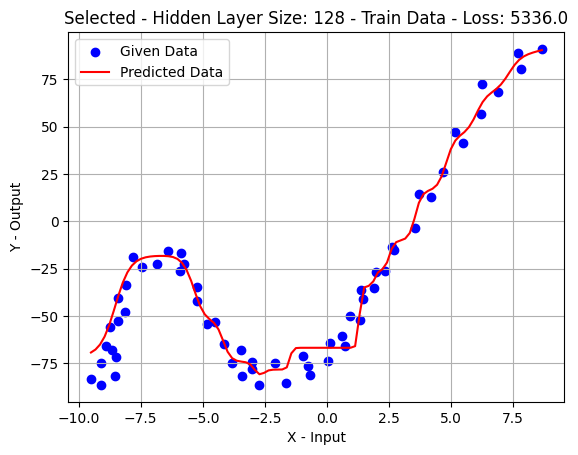

Train Data Loss:  5336.278192495982


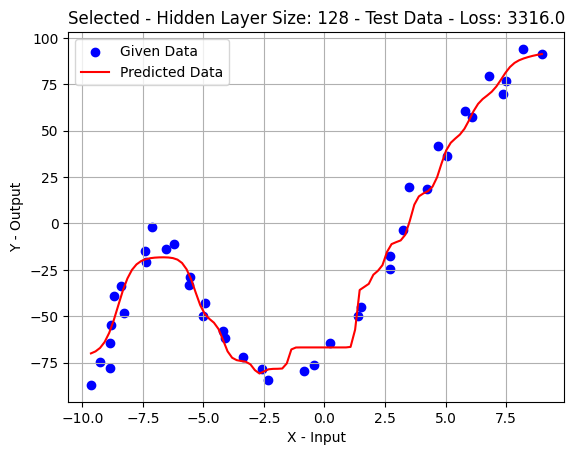

Test Data Loss:  3315.8063709024023


In [78]:
# Train the selected network with the raw training data
artificialNeuralNetwork = ArtificialNeuralNetwork(hidden_layer_size=128)
artificialNeuralNetwork.train(
    train_input,
    train_output,
    epochs=50000,
    learning_rate=0.001,
)

# Plot the predicted output of the network with the raw training data
artificialNeuralNetwork.plot(
    train_input,
    train_output,
    title=f"Selected - Hidden Layer Size: 128 - Train Data - Loss: {
        artificialNeuralNetwork.sum_squared_error(train_output, artificialNeuralNetwork.predict(train_input))
        }",
)   

print("Train Data Loss: ", artificialNeuralNetwork.sum_squared_error(train_output, artificialNeuralNetwork.predict(train_input ), False))   

artificialNeuralNetwork.plot(
    test_input,
    test_output,
    title=f"Selected - Hidden Layer Size: 128 - Test Data - Loss: {
        artificialNeuralNetwork.sum_squared_error(test_output, artificialNeuralNetwork.predict(test_input))
        }",
)

print   ("Test Data Loss: ", artificialNeuralNetwork.sum_squared_error(test_output, artificialNeuralNetwork.predict(test_input ), False))

# Part C

Created two different configurations for different hidden layer sizes

1. Epochs = 50000, Learning Rate = 0.001, raw data
2. Epochs = 100000, Learning Rate = 0.0005, raw data


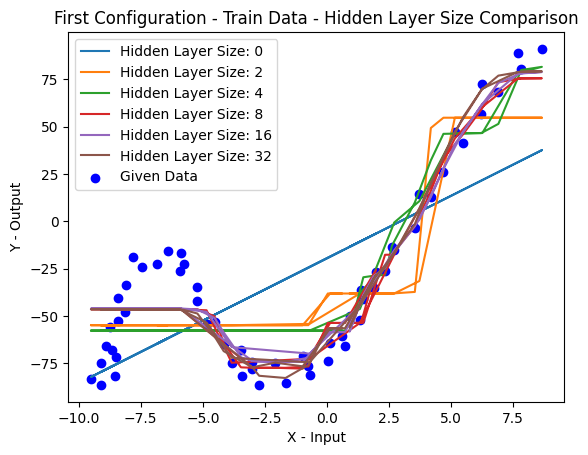

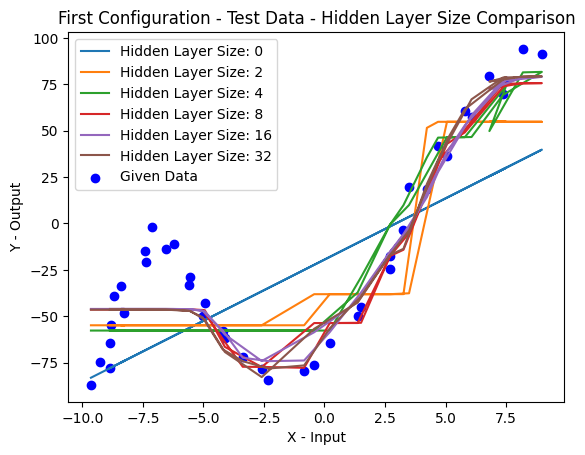

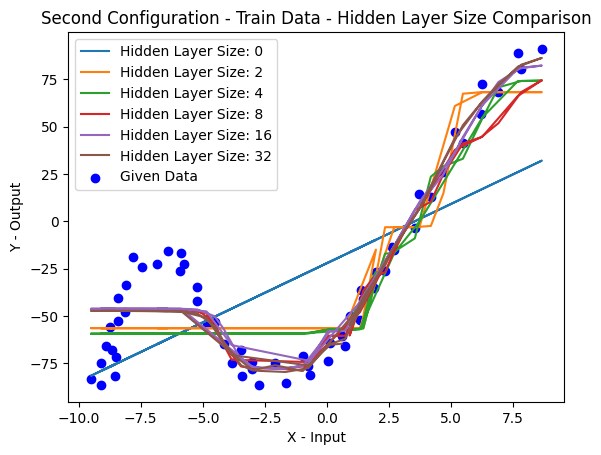

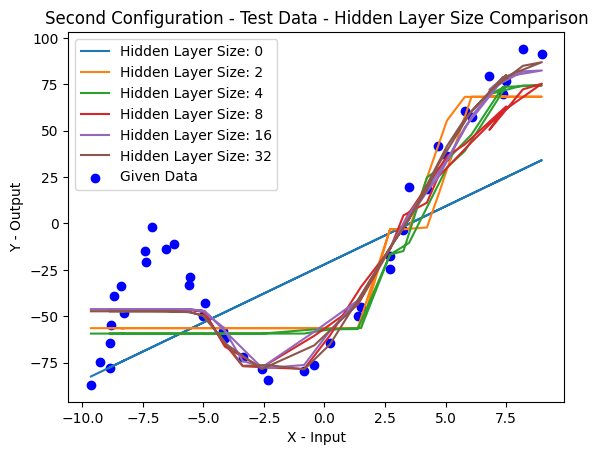

   Hidden Layer Size  Train First Loss Mean  Train First Loss Std  \
0                  0            1192.766255            999.795587   
1                  2             554.416474            480.623431   
2                  4             363.609614            435.587592   
3                  8             235.315270            362.673699   
4                 16             226.448878            366.413829   
5                 32             225.247079            365.192155   

   Test First Loss Mean  Test First Loss Std  Train Second Loss Mean  \
0           1337.362473          1136.573123             1190.697932   
1            703.964449           753.626750              394.189404   
2            496.715883           670.707029              362.011535   
3            318.372856           479.322391              247.783536   
4            303.834865           475.647482              221.701399   
5            311.440128           476.784012              212.266103   

   Train Se

In [79]:
# Now try differet hidden layer sizes with two different configurations
# 1. Epochs = 50000, Learning Rate = 0.001, raw data
# 2. Epochs = 100000, Learning Rate = 0.0005, raw data
hidden_layer_sizes = [0, 2, 4, 8, 16, 32]

# For the first configuration
train_first_outputs_every_hidden_layer_size = []
test_first_outputs_every_hidden_layer_size = []
# For the second configuration
train_second_outputs_every_hidden_layer_size = []
test_second_outputs_every_hidden_layer_size = []

# Gather the results for each hidden layer size for both configurations of the network
for hidden_layer_size in hidden_layer_sizes:
    # Train the network with the first configuration
    artificialNeuralNetwork = ArtificialNeuralNetwork(
        hidden_layer_size=hidden_layer_size
    )
    artificialNeuralNetwork.train(
        train_input,
        train_output,
        epochs=50000,
        learning_rate=0.001,
    )

    # Append the train and test data output and loss to the lists
    train_input_result = artificialNeuralNetwork.predict(train_input)
    train_first_outputs_every_hidden_layer_size.append(train_input_result)
    test_input_result = artificialNeuralNetwork.predict(test_input)
    test_first_outputs_every_hidden_layer_size.append(test_input_result)

    # Train the network with the second configuration
    artificialNeuralNetwork = ArtificialNeuralNetwork(
        hidden_layer_size=hidden_layer_size
    )
    artificialNeuralNetwork.train(
        train_input,
        train_output,
        epochs=100000,
        learning_rate=0.0005,
    )

    # Append the train and test data output and loss to the lists
    train_input_result = artificialNeuralNetwork.predict(train_input)
    train_second_outputs_every_hidden_layer_size.append(train_input_result)
    test_input_result = artificialNeuralNetwork.predict(test_input)
    test_second_outputs_every_hidden_layer_size.append(test_input_result)


# Print the losses of the networks with different hidden layer sizes for both configurations
def plot_outputs(plot_outputs, title, scatter_input, scatter_output):
    plt.figure()
    for i, output in enumerate(plot_outputs):
        plt.plot(
            scatter_input, output, label=f"Hidden Layer Size: {hidden_layer_sizes[i]}"
        )
    plt.scatter(scatter_input, scatter_output, color="blue", label="Given Data")
    plt.xlabel("X - Input")
    plt.ylabel("Y - Output")
    plt.title(title)
    plt.legend()
    plt.show()


# Plot the outputs of the networks with different hidden layer sizes for both configurations
plot_outputs(
    train_first_outputs_every_hidden_layer_size,
    "First Configuration - Train Data - Hidden Layer Size Comparison",
    train_input,
    train_output,
)

plot_outputs(
    test_first_outputs_every_hidden_layer_size,
    "First Configuration - Test Data - Hidden Layer Size Comparison",
    test_input,
    test_output,
)

plot_outputs(
    train_second_outputs_every_hidden_layer_size,
    "Second Configuration - Train Data - Hidden Layer Size Comparison",
    train_input,
    train_output,
)

plot_outputs(
    test_second_outputs_every_hidden_layer_size,
    "Second Configuration - Test Data - Hidden Layer Size Comparison",
    test_input,
    test_output,
)

# Calculate the losses of the networks with different hidden layer sizes for both configurations
train_first_losses = []
train_first_losses_means = []
train_first_losses_stds = []

test_first_losses = []
test_first_losses_means = []
test_first_losses_stds = []

train_second_losses = []
train_second_losses_means = []
train_second_losses_stds = []

test_second_losses = []
test_second_losses_means = []
test_second_losses_stds = []

# Calculate the losses of every hidden layer size for both configurations
for i, hidden_layer_size in enumerate(hidden_layer_sizes):
    train_first_losses.append(
        np.square(train_first_outputs_every_hidden_layer_size[i] - train_output)
    )
    test_first_losses.append(
        np.square(test_first_outputs_every_hidden_layer_size[i] - test_output)
    )
    train_second_losses.append(
        np.square(train_second_outputs_every_hidden_layer_size[i] - train_output)
    )
    test_second_losses.append(
        np.square(test_second_outputs_every_hidden_layer_size[i] - test_output)
    )

    train_first_losses_means.append(np.mean(train_first_losses[i]))
    train_first_losses_stds.append(np.std(train_first_losses[i]))

    test_first_losses_means.append(np.mean(test_first_losses[i]))
    test_first_losses_stds.append(np.std(test_first_losses[i]))

    train_second_losses_means.append(np.mean(train_second_losses[i]))
    train_second_losses_stds.append(np.std(train_second_losses[i]))

    test_second_losses_means.append(np.mean(test_second_losses[i]))
    test_second_losses_stds.append(np.std(test_second_losses[i]))


# Prepare a table for the losses of the networks with different hidden layer sizes for both configurations
# for each hidden layer size
table_data = {
    "Hidden Layer Size": hidden_layer_sizes,
    "Train First Loss Mean": train_first_losses_means,
    "Train First Loss Std": train_first_losses_stds,
    "Test First Loss Mean": test_first_losses_means,
    "Test First Loss Std": test_first_losses_stds,
    "Train Second Loss Mean": train_second_losses_means,
    "Train Second Loss Std": train_second_losses_stds,
    "Test Second Loss Mean": test_second_losses_means,
    "Test Second Loss Std": test_second_losses_stds,
}

print(pd.DataFrame(table_data))